## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()



W0730 21:01:32.778245  6788 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 21:01:33.040442  6788 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 21:01:33.071316  6788 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0730 21:01:33.322685  6788 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 21:01:33.346582  6788 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0730 21:01:33.679501  6788 deprecation.py:323] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 21:01:33.862013  6788 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 39s 781us/step - loss: 2.2830 - acc: 0.1369 - val_loss: 2.2546 - val_acc: 0.1745
Epoch 2/500
50000/50000 [==============================] - 8s 157us/step - loss: 2.2355 - acc: 0.1869 - val_loss: 2.2173 - val_acc: 0.2034
Epoch 3/500
50000/50000 [==============================] - 8s 153us/step - loss: 2.1990 - acc: 0.2125 - val_loss: 2.1805 - val_acc: 0.2336
Epoch 4/500
50000/50000 [==============================] - 8s 150us/step - loss: 2.1638 - acc: 0.2337 - val_loss: 2.1469 - val_acc: 0.2528
Epoch 5/500
50000/50000 [==============================] - 8s 154us/step - loss: 2.1312 - acc: 0.2509 - val_loss: 2.1152 - val_acc: 0.2618
Epoch 6/500
50000/50000 [==============================] - 8s 155us/step - loss: 2.1007 - acc: 0.2643 - val_loss: 2.0865 - val_acc: 0.2692
Epoch 7/500
50000/50000 [==============================] - 8s 152us/step - loss: 2.0728 - acc: 0.2747 - val_loss: 2

50000/50000 [==============================] - 8s 153us/step - loss: 1.6899 - acc: 0.4102 - val_loss: 1.6948 - val_acc: 0.4042
Epoch 60/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6867 - acc: 0.4117 - val_loss: 1.6944 - val_acc: 0.4056
Epoch 61/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6841 - acc: 0.4127 - val_loss: 1.6903 - val_acc: 0.4046
Epoch 62/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6810 - acc: 0.4139 - val_loss: 1.6873 - val_acc: 0.4075
Epoch 63/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6783 - acc: 0.4141 - val_loss: 1.6839 - val_acc: 0.4096
Epoch 64/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6753 - acc: 0.4142 - val_loss: 1.6831 - val_acc: 0.4048
Epoch 65/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6726 - acc: 0.4162 - val_loss: 1.6801 - val_acc: 0.4096
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 8s 152us/step - loss: 1.5566 - acc: 0.4566 - val_loss: 1.5803 - val_acc: 0.4451
Epoch 118/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.5548 - acc: 0.4564 - val_loss: 1.5788 - val_acc: 0.4406
Epoch 119/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.5531 - acc: 0.4577 - val_loss: 1.5744 - val_acc: 0.4458
Epoch 120/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.5511 - acc: 0.4586 - val_loss: 1.5746 - val_acc: 0.4469
Epoch 121/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.5493 - acc: 0.4592 - val_loss: 1.5745 - val_acc: 0.4503
Epoch 122/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.5474 - acc: 0.4599 - val_loss: 1.5705 - val_acc: 0.4465
Epoch 123/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5456 - acc: 0.4604 - val_loss: 1.5741 - val_acc: 0.4467
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 154us/step - loss: 1.4623 - acc: 0.4891 - val_loss: 1.5036 - val_acc: 0.4702
Epoch 176/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.4606 - acc: 0.4899 - val_loss: 1.5052 - val_acc: 0.4656
Epoch 177/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.4595 - acc: 0.4907 - val_loss: 1.5056 - val_acc: 0.4654
Epoch 178/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.4579 - acc: 0.4899 - val_loss: 1.5029 - val_acc: 0.4689
Epoch 179/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.4568 - acc: 0.4908 - val_loss: 1.4991 - val_acc: 0.4696
Epoch 180/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.4558 - acc: 0.4930 - val_loss: 1.5023 - val_acc: 0.4691
Epoch 181/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.4538 - acc: 0.4907 - val_loss: 1.4974 - val_acc: 0.4697
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 8s 153us/step - loss: 1.3853 - acc: 0.5159 - val_loss: 1.4503 - val_acc: 0.4849
Epoch 234/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.3836 - acc: 0.5160 - val_loss: 1.4686 - val_acc: 0.4816
Epoch 235/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.3828 - acc: 0.5169 - val_loss: 1.4533 - val_acc: 0.4859
Epoch 236/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.3816 - acc: 0.5175 - val_loss: 1.4482 - val_acc: 0.4828
Epoch 237/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.3802 - acc: 0.5176 - val_loss: 1.4471 - val_acc: 0.4831
Epoch 238/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.3793 - acc: 0.5184 - val_loss: 1.4524 - val_acc: 0.4804
Epoch 239/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.3783 - acc: 0.5176 - val_loss: 1.4556 - val_acc: 0.4804
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 8s 153us/step - loss: 1.3206 - acc: 0.5381 - val_loss: 1.4139 - val_acc: 0.4967
Epoch 292/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.3196 - acc: 0.5388 - val_loss: 1.4265 - val_acc: 0.4941
Epoch 293/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.3186 - acc: 0.5396 - val_loss: 1.4181 - val_acc: 0.4937
Epoch 294/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.3172 - acc: 0.5395 - val_loss: 1.4226 - val_acc: 0.4923
Epoch 295/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.3166 - acc: 0.5393 - val_loss: 1.4135 - val_acc: 0.4962
Epoch 296/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.3152 - acc: 0.5411 - val_loss: 1.4145 - val_acc: 0.4993
Epoch 297/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.3145 - acc: 0.5408 - val_loss: 1.4152 - val_acc: 0.4962
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 154us/step - loss: 1.2643 - acc: 0.5576 - val_loss: 1.3886 - val_acc: 0.5064
Epoch 350/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.2627 - acc: 0.5582 - val_loss: 1.3892 - val_acc: 0.5037
Epoch 351/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.2617 - acc: 0.5582 - val_loss: 1.4006 - val_acc: 0.5017
Epoch 352/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.2614 - acc: 0.5587 - val_loss: 1.3944 - val_acc: 0.5032
Epoch 353/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2602 - acc: 0.5591 - val_loss: 1.3864 - val_acc: 0.5057
Epoch 354/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2594 - acc: 0.5596 - val_loss: 1.3995 - val_acc: 0.4995
Epoch 355/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2583 - acc: 0.5593 - val_loss: 1.3923 - val_acc: 0.5019
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 7s 146us/step - loss: 1.2120 - acc: 0.5765 - val_loss: 1.3957 - val_acc: 0.5080
Epoch 408/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.2107 - acc: 0.5763 - val_loss: 1.3708 - val_acc: 0.5101
Epoch 409/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.2101 - acc: 0.5764 - val_loss: 1.3719 - val_acc: 0.5117
Epoch 410/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.2083 - acc: 0.5759 - val_loss: 1.3763 - val_acc: 0.5082
Epoch 411/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.2084 - acc: 0.5771 - val_loss: 1.3733 - val_acc: 0.5105
Epoch 412/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.2078 - acc: 0.5773 - val_loss: 1.3909 - val_acc: 0.5056
Epoch 413/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.2072 - acc: 0.5783 - val_loss: 1.3723 - val_acc: 0.5110
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 8s 152us/step - loss: 1.1629 - acc: 0.5927 - val_loss: 1.3604 - val_acc: 0.5154
Epoch 466/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.1617 - acc: 0.5926 - val_loss: 1.3858 - val_acc: 0.5096
Epoch 467/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.1608 - acc: 0.5932 - val_loss: 1.3619 - val_acc: 0.5157
Epoch 468/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.1593 - acc: 0.5946 - val_loss: 1.4275 - val_acc: 0.4967
Epoch 469/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.1593 - acc: 0.5939 - val_loss: 1.3702 - val_acc: 0.5118
Epoch 470/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1594 - acc: 0.5916 - val_loss: 1.3723 - val_acc: 0.5094
Epoch 471/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.1574 - acc: 0.5937 - val_loss: 1.3911 - val_acc: 0.5098
Epoch 472/500
50000/50000 [

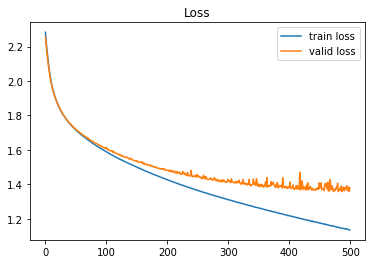

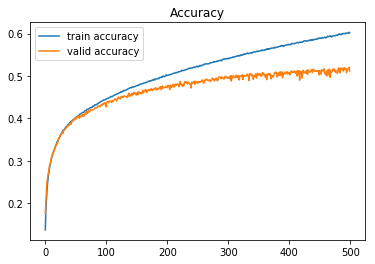

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()